In [1]:
%matplotlib inline

# Common imports

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

# Parameters to make prettier plots

In [3]:
import matplotlib
matplotlib.rcParams['xtick.labelsize'] = 10
matplotlib.rcParams['ytick.labelsize'] = 10
matplotlib.rcParams['axes.labelsize'] = 10
matplotlib.rcParams['axes.titlesize'] = 10

matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['grid.color'] = '0.5'
matplotlib.rcParams['grid.linewidth'] = '0.5'

matplotlib.rcParams['axes.edgecolor'] = '0.25'
matplotlib.rcParams['xtick.color'] = '0'
matplotlib.rcParams['ytick.color'] = '0'

matplotlib.rcParams['xtick.major.width'] = 1
matplotlib.rcParams['ytick.major.width'] = 1
matplotlib.rcParams['ytick.major.size'] = 5
matplotlib.rcParams['xtick.major.size'] = 5
matplotlib.rcParams['axes.spines.right'] = True
matplotlib.rcParams['axes.spines.left'] = True
matplotlib.rcParams['axes.spines.top'] = True
matplotlib.rcParams['axes.spines.bottom'] = True

matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = 'Helvetica'
matplotlib.rcParams['font.weight']='normal'
matplotlib.rcParams['axes.axisbelow'] = True

# Important parameters

# Reading in the data from sleuth

In [7]:
df = pd.read_csv('../kallisto_results/sleuth_rna_lrt.tsv', sep='\t')
df.set_index('target_id', inplace=True)
df.head()

,pval,qval,test_stat,rss,degrees_free,mean_obs,var_obs,tech_var,sigma_sq,smooth_sigma_sq,final_sigma_sq
target_id,,,,,,,,,,,
b0150_fhuA,2.081298e-07,0.000383,26.956095,2.675645,1,7.609299,0.891882,0.000675,0.891206,0.012725,0.891206
b1452_yncE,6.504661e-07,0.000383,24.756573,2.849337,1,6.694600,0.949779,0.001476,0.948303,0.012933,0.948303
b3162_deaD,6.086554e-07,0.000383,24.884637,1.713631,1,9.635700,0.571210,0.000064,0.571147,0.010277,0.571147
b3417_malP,4.976469e-07,0.000383,25.272919,4.761662,1,6.130382,1.587221,0.003463,1.583757,0.014127,1.583757
b3418_malT,5.854542e-07,0.000383,24.959563,1.920871,1,7.615709,0.640290,0.000617,0.639674,0.012721,0.639674


# And from kallisto

In [8]:
df_exp = pd.read_csv('../kallisto_results/kallisto_rna.tsv', sep='\t')
df_exp.head()

,target_id,sample,est_counts,tpm,eff_len,len,condition
1,b0001_thrL,RIBOTrep1,516.371434,5311.636414,8.781648,66,RiboT
2,b0001_thrL,RIBOTrep2,471.480351,4856.056700,8.781648,66,RiboT
3,b0001_thrL,WTrep1,453.127495,4657.632225,8.781648,66,WT
4,b0001_thrL,WTrep2,462.790030,4754.580149,8.781648,66,WT
5,b0002_thrA,RIBOTrep1,2366.930085,90.975709,2350.185433,2463,RiboT


# Combining these results into a single master table

In [10]:
df_exp_pivot = df_exp.pivot_table(values=['tpm', 'est_counts'], index='target_id', columns=['sample'])
temp_df_exp_pivot = df_exp.pivot_table(values=['len'], index='target_id', columns=['sample'])
assert list(df_exp_pivot.index) == list(temp_df_exp_pivot.index)
df_exp_pivot['length'] = temp_df_exp_pivot['len']['WTrep1']
df_exp_pivot.columns = ['_'.join(col).strip().strip('_') for col in df_exp_pivot.columns.values]
df_master = pd.concat([df_exp_pivot, df], axis=1)
df_master.head()

,est_counts_RIBOTrep1,est_counts_RIBOTrep2,est_counts_WTrep1,est_counts_WTrep2,tpm_RIBOTrep1,tpm_RIBOTrep2,tpm_WTrep1,tpm_WTrep2,length,pval,qval,test_stat,rss,degrees_free,mean_obs,var_obs,tech_var,sigma_sq,smooth_sigma_sq,final_sigma_sq
b0001_thrL,516.371434,471.480351,453.127495,462.790030,5311.636414,4856.056700,4657.632225,4754.580149,66,0.030031,0.074295,4.707506,0.009907,1.0,6.165090,0.003302,0.002039,0.001263,0.013995,0.013995
b0002_thrA,2366.930085,1980.217476,5821.600428,5964.422549,90.975709,76.128766,224.050831,229.210160,2463,0.000065,0.002262,15.943075,1.018492,1.0,8.180961,0.339497,0.000356,0.339141,0.012312,0.339141
b0003_thrB,777.744630,635.894012,2039.546721,2165.127632,88.999573,73.373359,231.971968,246.018841,933,0.000086,0.002611,15.432490,1.219232,1.0,7.103513,0.406411,0.001051,0.405359,0.012853,0.405359
b0004_thrC,1003.600213,887.350200,2953.369603,2979.330839,77.071171,67.972689,226.292418,228.397669,1287,0.000008,0.000743,19.998088,1.318453,1.0,7.422786,0.439484,0.000792,0.438693,0.012802,0.438693
b0005_yaaX,37.339028,25.387404,55.813199,71.050752,17.848370,12.139140,26.436996,33.885676,297,0.010658,0.039475,6.521491,0.600735,1.0,3.797108,0.200245,0.023106,0.177139,0.030345,0.177139


**And calculating a few new columns**

In [11]:
###Mask the lowest of the low in terms of tpm, these seemed like outliers
df_master['tpm_WTrep1'] = df_master['tpm_WTrep1'].mask(df_master['tpm_WTrep1'] < 10e-2)
df_master['tpm_WTrep2'] = df_master['tpm_WTrep2'].mask(df_master['tpm_WTrep2'] < 10e-2)
df_master['tpm_RIBOTrep1'] = df_master['tpm_RIBOTrep1'].mask(df_master['tpm_RIBOTrep1'] < 10e-2)
df_master['tpm_RIBOTrep2'] = df_master['tpm_RIBOTrep2'].mask(df_master['tpm_RIBOTrep2'] < 10e-2)
###Calculate averages
df_master['tpm_avg_WT'] = df_master[['tpm_WTrep1', 'tpm_WTrep2']].mean(skipna=False, axis=1)
df_master['tpm_avg_RIBOT'] = df_master[['tpm_RIBOTrep1', 'tpm_RIBOTrep2']].mean(skipna=False, axis=1)

In [12]:
###Fold change and cleanup, sort
df_master['log2FC'] = df_master['tpm_avg_RIBOT'].apply(np.log2) - df_master['tpm_avg_WT'].apply(np.log2)
df_master.replace([np.inf, -np.inf], np.nan, inplace=True)
df_master.sort_values('log2FC', inplace=True)
df_master[df_master['log2FC'].isnull()==False].head()

,est_counts_RIBOTrep1,est_counts_RIBOTrep2,est_counts_WTrep1,est_counts_WTrep2,tpm_RIBOTrep1,tpm_RIBOTrep2,tpm_WTrep1,tpm_WTrep2,length,pval,...,degrees_free,mean_obs,var_obs,tech_var,sigma_sq,smooth_sigma_sq,final_sigma_sq,tpm_avg_WT,tpm_avg_RIBOT,log2FC
b4354_btsT,234.971066,95.808188,9100.442134,8350.873580,10.934242,4.443677,422.792585,387.315424,2151,0.000155,...,1.0,7.043864,5.625156,0.004394,5.620762,0.012853,5.620762,405.054004,7.688959,-5.719182
b4034_malE,38.249736,29.014175,1427.493508,1448.859244,3.123373,2.374562,116.923254,119.026888,1191,0.000002,...,1.0,5.396224,4.701025,0.016919,4.684106,0.018561,4.684106,117.975071,2.748968,-5.423448
b4035_malK,27.322656,18.133860,703.850902,771.956814,2.561546,1.707272,65.771980,71.818094,1116,0.000011,...,1.0,4.864421,4.060389,0.025185,4.035204,0.022269,4.035204,68.795037,2.134409,-5.010396
b2155_cirA,151.177528,117.265626,2084.008083,2298.587827,7.317184,5.696489,100.121520,110.551885,1992,0.000005,...,1.0,6.293252,2.618241,0.004400,2.613841,0.013569,2.613841,105.336703,6.506836,-4.016908
b4036_lamB,74.678056,66.490819,1180.591052,1083.043888,5.369988,4.757619,84.615913,77.963187,1341,0.000001,...,1.0,5.646650,2.559030,0.007364,2.551666,0.016586,2.551666,81.289550,5.063803,-4.004777


# Statistics / consistency summary
Which is to say, compare WT replicates vs one another and RiboT replicates vs one another

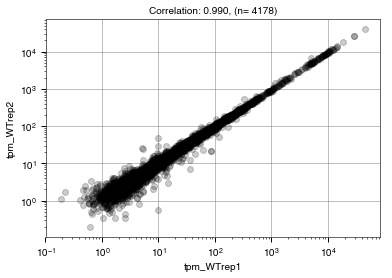

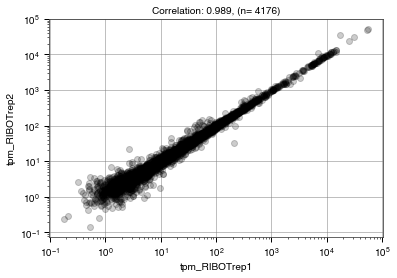

In [13]:
x_label, y_label = ('tpm_WTrep1', 'tpm_WTrep2')
temp_df = df_master[(df_master[x_label].isnull()==False)\
                  & (df_master[y_label].isnull()==False)]
rho, p = stats.spearmanr(temp_df[x_label], temp_df[y_label])
n = len(temp_df.index)
fig, ax = plt.subplots()
ax.loglog(temp_df[x_label], temp_df[y_label], 'ko', alpha=0.2)
ax.set_title('Correlation: {:.3f}, (n= {})'.format(rho, n))
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
plt.savefig('../Results/RNA_WT_comparison.pdf', bbox_inches='tight')

x_label, y_label = ('tpm_RIBOTrep1', 'tpm_RIBOTrep2')
temp_df = df_master[(df_master[x_label].isnull()==False)\
                  & (df_master[y_label].isnull()==False)]
rho, p = stats.spearmanr(temp_df[x_label], temp_df[y_label])
n = len(temp_df.index)
fig, ax = plt.subplots()
ax.loglog(temp_df[x_label], temp_df[y_label], 'ko', alpha=0.2)
ax.set_title('Correlation: {:.3f}, (n= {})'.format(rho, n))
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
plt.savefig('../Results/RNA_RIBOT_comparison.pdf', bbox_inches='tight')

# Plotting

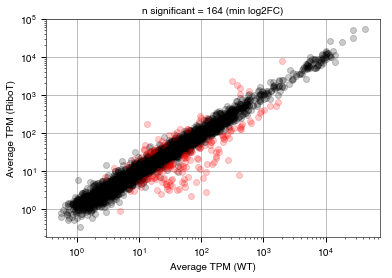

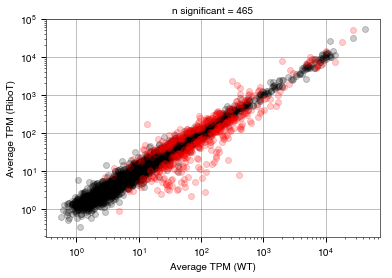

In [15]:
plot_df = df_master
qval = 0.01
non_sig_df = plot_df[(plot_df['qval'] >= qval) | (plot_df['log2FC'].abs() <= 1.)]
sig_df = plot_df[(plot_df['qval'] < qval) & (plot_df['log2FC'].abs() > 1.)]

fig, ax = plt.subplots()
ax.loglog(non_sig_df['tpm_avg_WT'], non_sig_df['tpm_avg_RIBOT'], 'ko', alpha=0.2)
ax.loglog(sig_df['tpm_avg_WT'], sig_df['tpm_avg_RIBOT'], 'ro', alpha=0.2)
ax.set_title('n significant = {} (min log2FC)'.format(len(sig_df.index)))
ax.set_xlabel('Average TPM (WT)')
ax.set_ylabel('Average TPM (RiboT)')
plt.savefig('../Results/RNA_diff_exp_v1.pdf', bbox_inches='tight')


#
#
#
#
non_sig_df = plot_df[(plot_df['qval'] >= qval)]
sig_df = plot_df[(plot_df['qval'] < qval)]
fig, ax = plt.subplots()
ax.loglog(non_sig_df['tpm_avg_WT'], non_sig_df['tpm_avg_RIBOT'], 'ko', alpha=0.2)
ax.loglog(sig_df['tpm_avg_WT'], sig_df['tpm_avg_RIBOT'], 'ro', alpha=0.2)
ax.set_title('n significant = {}'.format(len(sig_df.index)))
ax.set_xlabel('Average TPM (WT)')
ax.set_ylabel('Average TPM (RiboT)')
plt.savefig('../Results/RNA_diff_exp_v2.pdf', bbox_inches='tight')

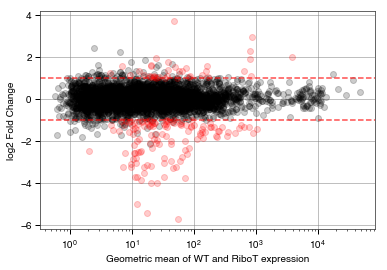

In [16]:
plot_df = df_master
non_sig_df = plot_df[(plot_df['qval'] >= qval) | (plot_df['log2FC'].abs() <= 1.)]
sig_df = plot_df[(plot_df['qval'] < qval) & (plot_df['log2FC'].abs() > 1.)]

fig, ax = plt.subplots()
ax.semilogx((non_sig_df['tpm_avg_WT']*non_sig_df['tpm_avg_RIBOT'])**(1./2), non_sig_df['log2FC'], 'ko', alpha=0.2)
ax.semilogx((sig_df['tpm_avg_WT']*sig_df['tpm_avg_RIBOT'])**(1./2), sig_df['log2FC'], 'ro', alpha=0.2)
ax.axhline(1, color='r', linestyle='--', alpha=0.7)
ax.axhline(-1, color='r', linestyle='--', alpha=0.7)
ax.set_xlabel('Geometric mean of WT and RiboT expression')
ax.set_ylabel('log2 Fold Change')
plt.savefig('../Results/RNA_diff_exp_fc.pdf', bbox_inches='tight')

# Write dataframe outputs

In [17]:
df_condensed = df_master[['tpm_avg_WT', 'tpm_avg_RIBOT', 'log2FC', 'qval',\
          'tpm_WTrep1', 'tpm_WTrep2', 'tpm_RIBOTrep1', 'tpm_RIBOTrep2'\
           ]]
df_condensed['fcabs'] = df_condensed['log2FC'].abs()*-1
df_condensed.sort_values(['qval', 'fcabs'], inplace=True)
df_condensed.drop(['fcabs'], axis=1, inplace=True)

/Users/adamhockenberry/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/adamhockenberry/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/adamhockenberry/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documen

In [18]:
df_master.to_csv('../Results/master_table_rna.csv')
df_condensed.to_csv('../Results/shortened_table_rna.csv')
df_condensed[(df_condensed['qval']<0.001) &\
             (df_condensed['log2FC'].abs()>1.)].to_csv('../Results/shortened_table_rna_most_sig.csv')

# Gene families
malE, malK, malP, malF, malG, malQ, malT
https://ecocyc.org/ECOLI/NEW-IMAGE?type=OPERON&object=TU00038
https://biocyc.org/ECOLI/NEW-IMAGE?type=OPERON&object=TU00039

entB, entH, entC, entE, entA, entF, entS
https://ecocyc.org/ECOLI/NEW-IMAGE?type=OPERON&object=TU00166

fecA, fecB, fecC, fecD, fecE
https://ecocyc.org/ECOLI/NEW-IMAGE?type=OPERON&object=TU00151

fepA, fepD, fepC, fepG, fepB
https://ecocyc.org/ECOLI/NEW-IMAGE?type=OPERON&object=TU0-3963

treC, treB
https://ecocyc.org/ECOLI/NEW-IMAGE?type=OPERON&object=TU00213

fhuF, fhuA, fhuC
https://ecocyc.org/ECOLI/NEW-IMAGE?type=OPERON&object=TU00020

yjiY, yjiX
https://ecocyc.org/ECOLI/NEW-IMAGE?type=OPERON&object=TU0-14208

pyrB, pyrI
https://ecocyc.org/ECOLI/NEW-IMAGE?type=OPERON&object=TU00484